# Case Study 1

#### Predicting Central Neuropathic Pain (CNP) in people with Spinal Cord Injury (SCI) from Electroencephalogram (EEG) data.

* CNP is pain in response to non-painful stimuli, episodic (electric shock), “pins and needles”, numbness
* There is currently no treatment, only prevention
* Preventative medications have strong side-effects
* Predicting whether a patient is likely to develop pain is useful for selective treatment

#### Task
Your task is to devise a feature engineering strategy which, in combination with a classifier of your choice, optizimes prediction accuracy.

#### Data
The data is preprocessed brain EEG data from SCI patients recorded while resting with eyes closed (EC) and eyes opened (EO).
* 48 electrodes recording electrical activity of the brain at 250 Hz 
* 2 classes: subject will / will not develop neuropathic pain within 6 months
* 18 subjects: 10 developed pain and 8 didn’t develop pain
* the data has already undergone some preprocessing
  * Signal denoising and normalization
  * Temporal segmentation
  * Frequency band power estimation
  * Normalization with respect to total band power
  * Features include normalized alpha, beta, theta band power while eyes closed, eyes opened, and taking the ratio of eo/ec.
* the data is provided in a single table ('data.csv') consisting of 
  * 180 rows (18 subjects x 10 repetitions), each containing
  * 432 columns (9 features x 48 electrodes)
  * rows are in subject major order, i.e. rows 0-9 are all samples from subject 0, rows 10-19 all samples from subject 1, etc.
  * columns are in feature_type major order, i.e. columns 0-47 are alpha band power, eyes closed, electrodes 0-48
  * feature identifiers for all columns are stored in 'feature_names.csv'
  * 'labels.csv' defines the corresponding class (0 or 1) to each row in data.csv

#### Objective Measure
Leave one subject out cross-validation accuracy, sensitivity and specificity.

#### Report
Report on your feature engineering pipeline, the classifier used to evaluate performance, and the performance as mean and standard deviation of accuracy, sensitivity and specificity across folds. Give evidence for why your strategy is better than others.




In [1]:
import csv
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupKFold
from matplotlib import pyplot as plt

In [2]:
# load data
# rows in X are subject major order, i.e. rows 0-9 are all samples from subject 0, rows 10-19 all samples from subject 1, etc.
# columns in X are in feature_type major order, i.e. columns 0-47 are alpha band power, eyes closed, electrodes 0-48
# feature identifiers for all columns in X are stored in feature_names.csv
X = np.loadtxt('data.csv', delimiter=',') 
y = np.loadtxt('labels.csv', delimiter=',')
with open('feature_names.csv') as f:
    csvreader = csv.reader(f, delimiter=',')
    feature_names = [row for row in csvreader][0]
print(X)


[[0.11184 0.12387 0.12858 ... 0.60436 0.56294 1.0144 ]
 [0.29834 0.26881 0.26239 ... 0.58386 0.46658 0.74867]
 [0.36912 0.39587 0.38999 ... 0.49383 0.62363 0.61417]
 ...
 [0.15921 0.15782 0.16968 ... 0.63907 0.62307 1.0707 ]
 [0.94111 0.95293 0.9505  ... 0.99212 0.97502 0.97734]
 [0.25397 0.2434  0.26774 ... 0.83146 0.76753 0.81081]]


In [3]:
groups = np.repeat(0,10)
for i in range(1,18):
    groups = np.hstack((groups, np.repeat(i,10)))
#print(groups)
group_kfold = GroupKFold(n_splits=3)
group_kfold.get_n_splits(X, y, groups)
#print(group_kfold)
for train_index, test_index in group_kfold.split(X, y, groups):    
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

   




TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169] TEST: [ 20  21  22  23  24  25  26  27  28  29  50  51  52  53  54  55  56  57
  58  59  80  81  82  83  84  85  86  87  88  89 110 111 112 113 114 115
 116 117 118 119 140 141 142 143 144 145 146 147 148 149 170 171 172 173
 174 175 176 177 178 179]
[[0.11184  0.12387  0.12858  ... 0.60436  0.56294  1.0144  ]
 [0.29834  0.26881  0.26239  ... 0.58386  0.46658  0.74867 ]
 [0.36912  0.39587  0.38999  ... 0.49383  0.62363  0.61417 ]
 ...
 [0.087402 0.1011   0.11913  ... 4.2296   1.9077   0.57682 ]
 [0.2

In [4]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
predictions=logmodel.predict(X_test)

In [6]:
from sklearn.metrics import classification_report

In [7]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.82      0.88        40
         1.0       0.72      0.90      0.80        20

    accuracy                           0.85        60
   macro avg       0.83      0.86      0.84        60
weighted avg       0.87      0.85      0.85        60



In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
matrix=confusion_matrix(y_test,predictions)
print(matrix)

[[33  7]
 [ 2 18]]


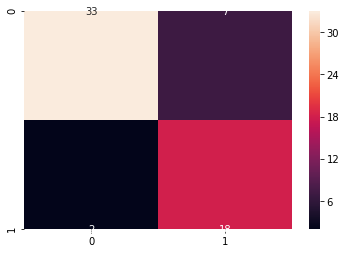

In [10]:
sns.heatmap(matrix,annot=True,cbar=True)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_test,predictions)

0.85

In [13]:
sensitivity=33/(33+2)
print(sensitivity)

0.9428571428571428


In [14]:
specificity=18/(18+7)
print(specificity)

0.72


In [15]:
from sklearn.model_selection import cross_val_score
initial_cv_score = cross_val_score(logmodel, X, y, groups=groups, cv=group_kfold,  scoring='accuracy').mean()
print("Initial cross validation score : {} ".format(initial_cv_score))

Initial cross validation score : 0.8444444444444444 


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Optimal number of features : 158


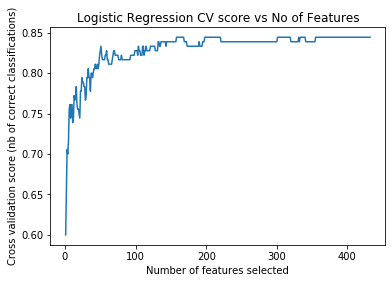

In [16]:
# Recursive Feature Elimination wrapper class
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupKFold
from sklearn.feature_selection import RFECV

log_rfecv = LogisticRegression(solver='liblinear')


rfecv = RFECV(estimator=log_rfecv, step=1, cv=group_kfold, scoring='accuracy')
rfecv.fit(X, y,groups=groups)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [17]:
feature_rank = list(zip(feature_names, rfecv.support_))
new_features = []
for index,value in enumerate(feature_rank):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['alpha_ec_5', 'alpha_ec_6', 'alpha_ec_11', 'alpha_ec_12', 'alpha_ec_16', 'alpha_ec_17', 'alpha_ec_21', 'alpha_ec_23', 'alpha_ec_25', 'alpha_ec_30', 'alpha_ec_31', 'alpha_ec_39', 'alpha_ec_41', 'alpha_ec_42', 'alpha_ec_44', 'alpha_ec_45', 'beta_ec_5', 'beta_ec_11', 'beta_ec_12', 'beta_ec_22', 'beta_ec_26', 'theta_ec_2', 'theta_ec_20', 'theta_ec_21', 'theta_ec_25', 'theta_ec_26', 'theta_ec_28', 'theta_ec_29', 'theta_ec_32', 'theta_ec_33', 'theta_ec_34', 'alpha_eo_3', 'alpha_eo_9', 'alpha_eo_10', 'alpha_eo_14', 'alpha_eo_31', 'alpha_eo_34', 'alpha_eo_40', 'alpha_eo_41', 'alpha_eo_42', 'beta_eo_0', 'beta_eo_1', 'beta_eo_3', 'beta_eo_14', 'beta_eo_15', 'beta_eo_17', 'beta_eo_18', 'beta_eo_22', 'beta_eo_25', 'beta_eo_26', 'beta_eo_27', 'beta_eo_29', 'beta_eo_30', 'beta_eo_34', 'beta_eo_47', 'theta_eo_0', 'theta_eo_1', 'theta_eo_2', 'theta_eo_8', 'theta_eo_14', 'theta_eo_19', 'theta_eo_20', 'theta_eo_21', 'theta_eo_25', 'theta_eo_26', 'theta_eo_27', 'theta_eo_28', 'theta_eo_29', 'theta_eo_32

In [18]:
X_features=rfecv.fit_transform(X,y,groups=groups)
cv_fe_score = cross_val_score(log_rfecv, X_features, y, groups=groups, cv=group_kfold, scoring='accuracy').mean()
print("CV Score after Feature Selection : {} ".format(cv_fe_score))

CV Score after Feature Selection : 0.8611111111111112 


In [19]:
group_kfold1 = GroupKFold(n_splits=3)
group_kfold1.get_n_splits(X_features, y, groups)
print(X_features.shape)
for train_index1, test_index1 in group_kfold1.split(X_features, y, groups):    
    print("TRAIN:", train_index1, "TEST:", test_index1)
    X_train1, X_test1 = X_features[train_index1], X_features[test_index1]
    y_train1, y_test1 = y[train_index1], y[test_index1]
    print(X_train1, X_test1, y_train1, y_test1)

(180, 158)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169] TEST: [ 20  21  22  23  24  25  26  27  28  29  50  51  52  53  54  55  56  57
  58  59  80  81  82  83  84  85  86  87  88  89 110 111 112 113 114 115
 116 117 118 119 140 141 142 143 144 145 146 147 148 149 170 171 172 173
 174 175 176 177 178 179]
[[0.1069   0.10756  0.095234 ... 0.59345  0.60436  0.56294 ]
 [0.285    0.24791  0.33123  ... 0.66352  0.58386  0.46658 ]
 [0.44199  0.44004  0.40516  ... 0.33478  0.49383  0.62363 ]
 ...
 [0.0577   0.06894  0.043566 ... 3.9593   4.2296   1.90

In [21]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train1,y_train1)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred=logisticRegr.predict(X_test1)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test1, y_pred)
print(cm)
accuracy_score(y_test1,y_pred)

[[33  7]
 [ 2 18]]


0.85

In [24]:
Sensitivity= 33/(33+7)
print(Sensitivity)

0.825


In [25]:
Specificity= 18/(18+2)
print(Specificity)

0.9


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_train1=pca.fit_transform(X_train1)
X_test1 = pca.transform(X_test1)

In [28]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.26737001 0.14467942 0.11360475 0.08986088 0.08324745 0.04294104
 0.02510253 0.01857365 0.01702438 0.012726   0.01215335 0.01166595
 0.01027588 0.00908578 0.00894079 0.00783823 0.00755611 0.0070659
 0.00655248 0.0061215  0.00598955 0.00518428 0.0046663  0.00455091
 0.00434788 0.00411742 0.0035839  0.00340709 0.00319574 0.00299569
 0.00289038 0.00278189]


In [29]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred=logisticRegr.predict(X_test1)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test1, y_pred)
print(cm)
accuracy_score(y_test1,y_pred)

[[34  6]
 [ 0 20]]


0.9

In [32]:
Sensitivity= 34/(34+6)
print(Sensitivity)

0.85


In [33]:
Specificity= 20/(20+0)
print(Specificity)

1.0


In [34]:
#Chi Squared Method Feature Filtering method
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
X = X.astype(int)
#Select 300 features based on importance
chi2_features = SelectKBest(chi2, k = 300) 
X_kbest_features = chi2_features.fit_transform(X, y) 
print('Original feature number:', X.shape[1]) 
print(X_kbest_features)

Original feature number: 432
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [64]:
#Perform Cross Validation after Feature selection
group_kfold0 = GroupKFold(n_splits=3)
group_kfold0.get_n_splits(X_kbest_features, y, groups)
print(group_kfold0)
for train_index0, test_index0 in group_kfold0.split(X_kbest_features, y, groups):    
    print("TRAIN:", train_index0, "TEST:", test_index0)
    X_train0, X_test0 = X[train_index0], X[test_index0]
    y_train0, y_test0 = y[train_index0], y[test_index0]
    print(X_train0, X_test0, y_train0, y_test0)

GroupKFold(n_splits=3)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169] TEST: [ 20  21  22  23  24  25  26  27  28  29  50  51  52  53  54  55  56  57
  58  59  80  81  82  83  84  85  86  87  88  89 110 111 112 113 114 115
 116 117 118 119 140 141 142 143 144 145 146 147 148 149 170 171 172 173
 174 175 176 177 178 179]
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]] [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ...

In [65]:
logmodel0=LogisticRegression()
logmodel0.fit(X_train0,y_train0)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
predictions0=logmodel0.predict(X_test0)

In [67]:
classification_report(y_test0,predictions0)

'              precision    recall  f1-score   support\n\n         0.0       0.83      0.75      0.79        40\n         1.0       0.58      0.70      0.64        20\n\n    accuracy                           0.73        60\n   macro avg       0.71      0.72      0.71        60\nweighted avg       0.75      0.73      0.74        60\n'

In [68]:
matrix0=confusion_matrix(y_test0,predictions0)
matrix0

array([[30, 10],
       [ 6, 14]])

In [69]:
accuracy_score(y_test0,predictions0)

0.7333333333333333

In [70]:
Sensitivity= 30/(30+6)
print(Sensitivity)

0.8333333333333334


In [71]:
Specificity= 14/(14+10)
print(Specificity)

0.5833333333333334


In [72]:
from sklearn.model_selection import cross_val_score
chi_cv_score = cross_val_score(logmodel0, X_kbest_features, y, groups=groups, cv=group_kfold0,  scoring='accuracy').mean()
print(" Cross validation score after Chi Squared  : {} ".format(chi_cv_score))

 Cross validation score after Chi Squared  : 0.7388888888888889 


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
#Mutual Information Feature Filtering method
from sklearn.feature_selection import mutual_info_classif 
X = X.astype(int)
#Select 300 best features based on importance
mutual_features = SelectKBest(mutual_info_classif, k = 300) 
X_kbest_features1 = mutual_features.fit_transform(X, y) 
print('Original feature number:', X.shape[1]) 
print(X_kbest_features1)

Original feature number: 432
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [76]:
#Perform cross Vlaidation after festure selection
group_kfold2 = GroupKFold(n_splits=3)
group_kfold2.get_n_splits(X_kbest_features1, y, groups)
print(group_kfold2)
for train_index2, test_index2 in group_kfold2.split(X_kbest_features1, y, groups):    
    print("TRAIN:", train_index2, "TEST:", test_index2)
    X_train2, X_test2 = X[train_index2], X[test_index2]
    y_train2, y_test2 = y[train_index2], y[test_index2]
    print(X_train2, X_test2, y_train2, y_test2)

GroupKFold(n_splits=3)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169] TEST: [ 20  21  22  23  24  25  26  27  28  29  50  51  52  53  54  55  56  57
  58  59  80  81  82  83  84  85  86  87  88  89 110 111 112 113 114 115
 116 117 118 119 140 141 142 143 144 145 146 147 148 149 170 171 172 173
 174 175 176 177 178 179]
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]] [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ...

In [77]:
logmodel2=LogisticRegression()
logmodel2.fit(X_train2,y_train2)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
predictions2=logmodel2.predict(X_test2)

In [79]:
classification_report(y_test2,predictions2)

'              precision    recall  f1-score   support\n\n         0.0       0.83      0.75      0.79        40\n         1.0       0.58      0.70      0.64        20\n\n    accuracy                           0.73        60\n   macro avg       0.71      0.72      0.71        60\nweighted avg       0.75      0.73      0.74        60\n'

In [80]:
matrix2=confusion_matrix(y_test2,predictions2)
matrix2

array([[30, 10],
       [ 6, 14]])

In [81]:
accuracy_score(y_test2,predictions2)

0.7333333333333333

In [82]:
Sensitivity= 30/(30+6)
print(Sensitivity)

0.8333333333333334


In [83]:
Specificity= 14/(14+10)
print(Specificity)

0.5833333333333334


In [84]:
from sklearn.model_selection import cross_val_score
mutual_cv_score = cross_val_score(logmodel2, X_kbest_features1, y, groups=groups, cv=group_kfold2,  scoring='accuracy').mean()
print(" Cross validation score after Mutual Information : {} ".format(mutual_cv_score))

 Cross validation score after Mutual Information : 0.7388888888888889 


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [85]:
#ANOVA F- test
from sklearn.feature_selection import f_classif
X = X.astype(int)
ANOVA_features = SelectKBest(f_classif, k = 300) 
X_kbest_features2 = ANOVA_features.fit_transform(X, y) 
print('Original feature number:', X.shape[1]) 
print(X_kbest_features2.shape[1])

Original feature number: 432
300


/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  22  23  24  30  32  44  45  46  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236

In [86]:
group_kfold3 = GroupKFold(n_splits=3)
group_kfold3.get_n_splits(X_kbest_features2, y, groups)
print(group_kfold3)
for train_index3, test_index3 in group_kfold3.split(X_kbest_features2, y, groups):    
    print("TRAIN:", train_index3, "TEST:", test_index3)
    X_train3, X_test3 = X[train_index3], X[test_index3]
    y_train3, y_test3 = y[train_index3], y[test_index3]
    print(X_train3, X_test3, y_train3, y_test3)

GroupKFold(n_splits=3)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169] TEST: [ 20  21  22  23  24  25  26  27  28  29  50  51  52  53  54  55  56  57
  58  59  80  81  82  83  84  85  86  87  88  89 110 111 112 113 114 115
 116 117 118 119 140 141 142 143 144 145 146 147 148 149 170 171 172 173
 174 175 176 177 178 179]
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]] [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ...

In [87]:
logmodel3=LogisticRegression()
logmodel3.fit(X_train3,y_train3)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
predictions3=logmodel3.predict(X_test3)

In [89]:
classification_report(y_test3,predictions3)

'              precision    recall  f1-score   support\n\n         0.0       0.83      0.75      0.79        40\n         1.0       0.58      0.70      0.64        20\n\n    accuracy                           0.73        60\n   macro avg       0.71      0.72      0.71        60\nweighted avg       0.75      0.73      0.74        60\n'

In [90]:
matrix3=confusion_matrix(y_test3,predictions3)
matrix3

array([[30, 10],
       [ 6, 14]])

In [91]:
accuracy_score(y_test3,predictions3)

0.7333333333333333

In [92]:
Sensitivity= 30/(30+6)
print(Sensitivity)

0.8333333333333334


In [93]:
Specificity= 14/(14+10)
print(Specificity)

0.5833333333333334


In [94]:
from sklearn.model_selection import cross_val_score
anova_cv_score = cross_val_score(logmodel3, X_kbest_features2, y, groups=groups, cv=group_kfold3,  scoring='accuracy').mean()
print(" Cross validation score after ANOVA Test : {} ".format(anova_cv_score))

 Cross validation score after ANOVA Test : 0.7388888888888889 


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
